In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [40]:
url = "C:\\Users\\elsines\\Desktop\\proyecto_grupal\\vgsales.csv"

In [41]:
data = pd.read_csv(url)

In [42]:
data.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [43]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

Rank - Clasificación de las ventas totales.<br>  
Name - Nombre del juego.<br>  
Platform - Plataforma de lanzamiento del juego (por ejemplo, PC, PS4, etc.).<br>  
Year - Año de lanzamiento del juego.<br>  
Genre - Género del juego.<br>  
Publisher - Editor del juego.<br>  
NA_Sales - Ventas en América del Norte (en millones).<br>  
EU_Sales - Ventas en Europa (en millones).<br>  
JP_Sales - Ventas en Japón (en millones).<br>  
Other_Sales - Ventas en el resto del mundo (en millones).<br>  
Global_Sales - Ventas totales en todo el mundo.<br>  

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [45]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [46]:
data.shape

(16598, 11)

In [47]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [48]:
data = data.dropna()
data.shape

(16291, 11)

In [49]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [50]:
columnas_ventas= ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

In [51]:
data[columnas_ventas].corr()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,0.941269,0.903264,0.612774,0.747964,1.000000


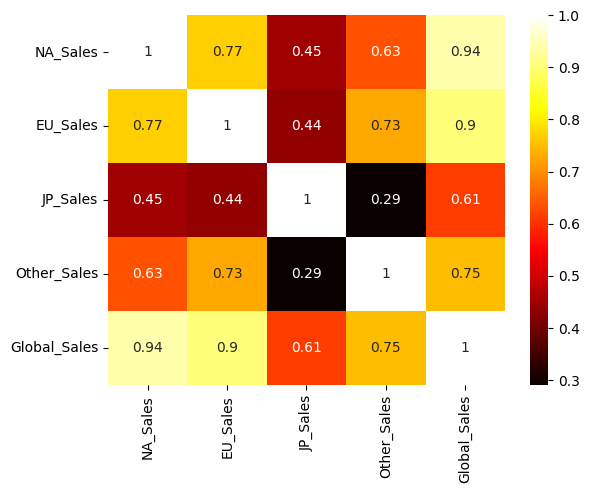

In [52]:
sns.heatmap(data[columnas_ventas].corr(), cmap="hot", annot=True)
plt.show()

In [53]:
ventas_globales = data.groupby("Year")["Global_Sales"].sum()

In [54]:
"""plt.figure(figsize=(20,5))
sns.barplot(data=data, x=ventas_globales.index, y=ventas_globales)
plt.show()"""

'plt.figure(figsize=(20,5))\nsns.barplot(data=data, x=ventas_globales.index, y=ventas_globales)\nplt.show()'

In [55]:
solo_numericas = data[columnas_ventas]

NA_Sales           Axes(0.125,0.653529;0.227941x0.226471)
EU_Sales        Axes(0.398529,0.653529;0.227941x0.226471)
JP_Sales        Axes(0.672059,0.653529;0.227941x0.226471)
Other_Sales        Axes(0.125,0.381765;0.227941x0.226471)
Global_Sales    Axes(0.398529,0.381765;0.227941x0.226471)
dtype: object

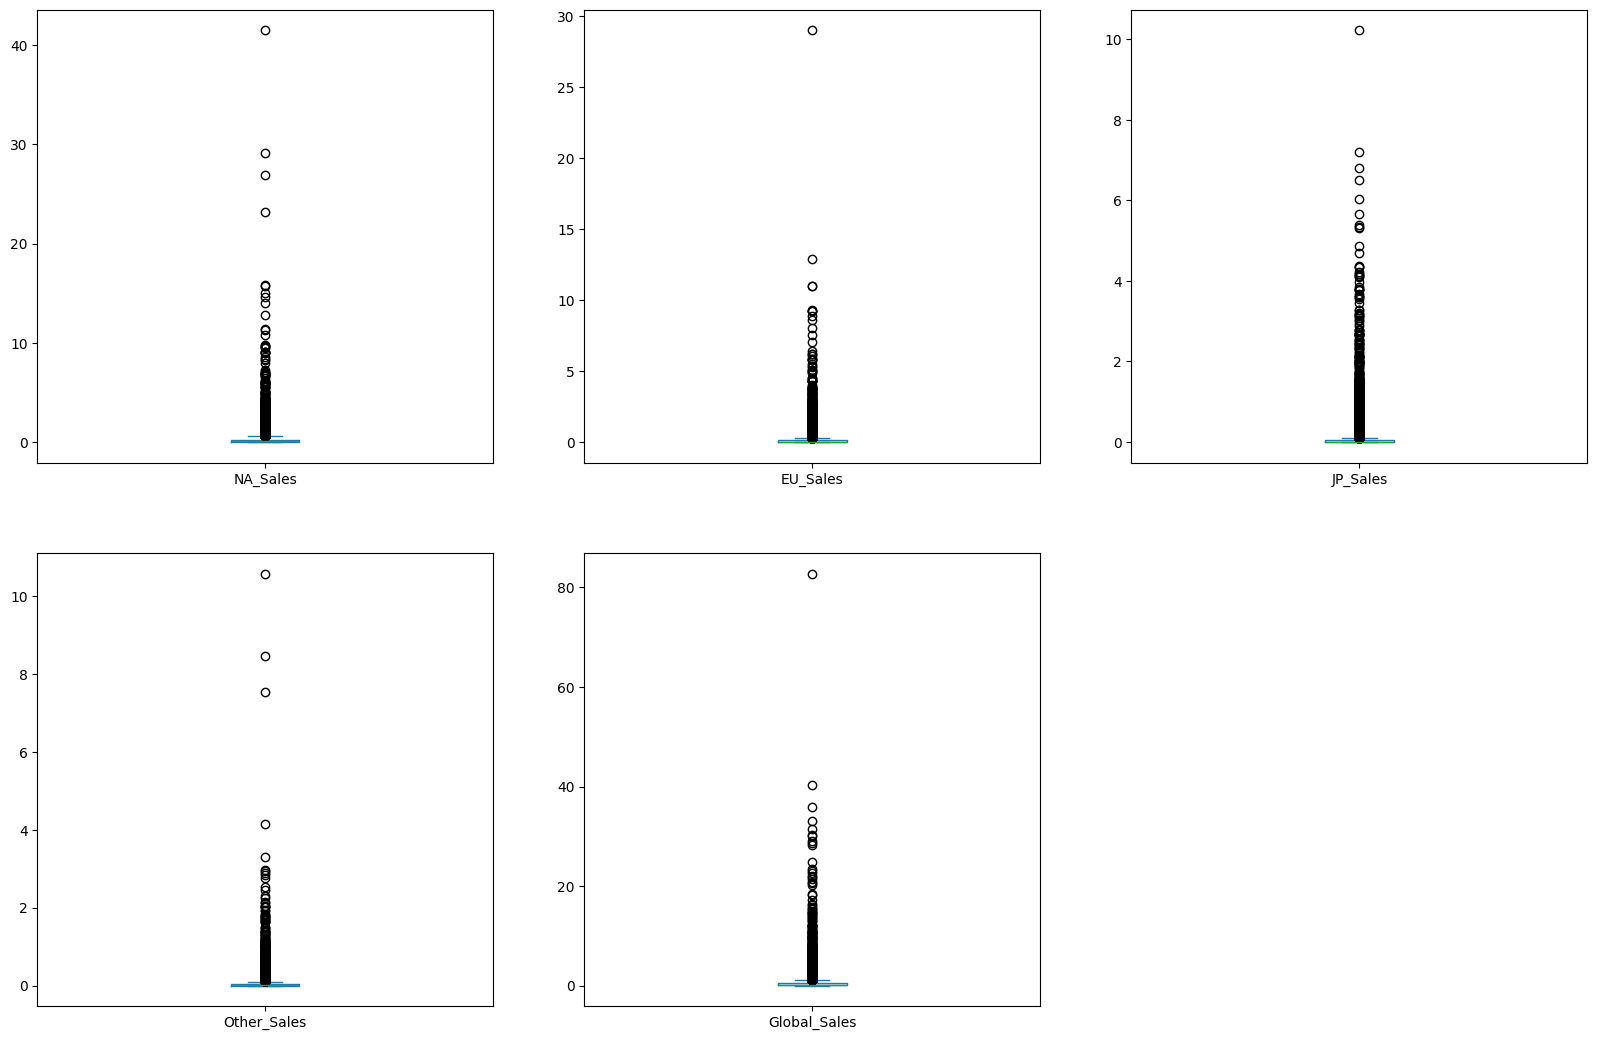

In [56]:
solo_numericas.plot(kind='box', subplots=True, figsize=(20,20), layout=(3,3))

In [57]:
solo_numericas.head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,41.49,29.02,3.77,8.46,82.74
1,29.08,3.58,6.81,0.77,40.24
2,15.85,12.88,3.79,3.31,35.82
3,15.75,11.01,3.28,2.96,33.00
4,11.27,8.89,10.22,1.00,31.37


In [58]:
X = solo_numericas.drop(['Global_Sales'] , axis =1 )
y = solo_numericas['Global_Sales'].values

In [59]:
X_train, X_test, y_train, y_test =  train_test_split(X,y , test_size=0.2 , random_state = 42)

In [60]:
print(X_train.shape)
print(y_train.shape)

(13032, 4)
(13032,)


In [61]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test.reshape(-1, 1)).flatten()



C:\Users\elsines\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\elsines\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\elsines\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\elsines\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.intercept_, model.coef_)

-8.63995558419108e-17 [0.53522147 0.312811   0.22152796 0.12282414]


In [63]:
predict = model.predict(X_test)

In [64]:
y_test-predict

array([ 0.00367361,  0.02118124, -0.026406  , ...,  0.01673688,
        0.01555863,  0.01892064])

In [65]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, predict)))
print("MAE:", mean_absolute_error(y_test, predict))

RMSE: 0.07482607807884419
MAE: 0.028284383827770057


In [66]:
model.score(X_test,y_test)

0.9944010580393388

In [67]:
predicciones = pd.DataFrame({'Y_test': y_test ,'Y_pre': predict})
predicciones.head(15)

,Y_test,Y_pre
0,0.000767,-0.002907
1,-0.240975,-0.262156
2,-0.182957,-0.156551
3,0.049115,0.036635
4,-0.168452,-0.185831
5,-0.221635,-0.237783
6,-0.192626,-0.171030
7,-0.211966,-0.199988
8,-0.265149,-0.279623
9,-0.173287,-0.142071


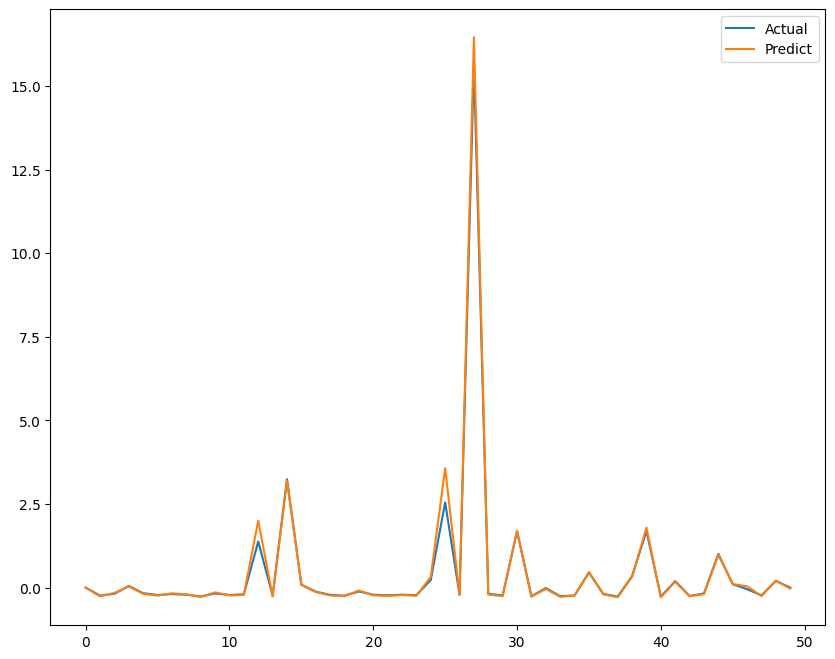

In [68]:
plt.figure(figsize=(10,8))
plt.plot(predicciones[:50])
plt.legend(['Actual' , 'Predict'])
plt.show();